In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128,activation=tf.nn.relu),
                          keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.5004 - acc: 0.8246
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.3774 - acc: 0.8631
Epoch 3/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.3390 - acc: 0.8761
Epoch 4/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.3161 - acc: 0.8835
Epoch 5/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.2972 - acc: 0.8901


In [38]:
predict = model.predict_classes(test_images)

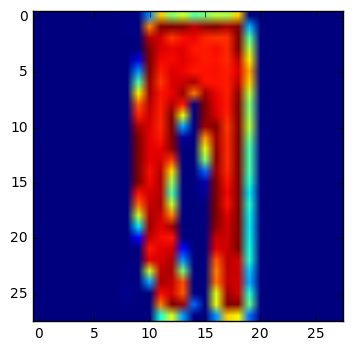

In [43]:
%matplotlib inline
plt.imshow(test_images[2])

Ankle boot Ankle boot
Pullover Pullover
Trouser Trouser
Trouser Trouser
T-shirt/top Shirt


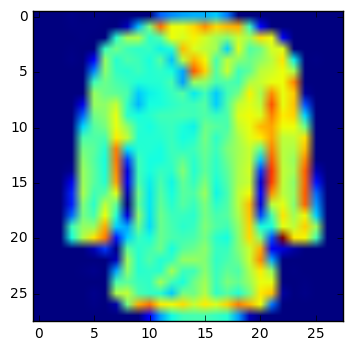

In [45]:
import time
for i in range(5):
    plt.imshow(test_images[i])
    print(class_names[predict[i]],class_names[test_labels[i]])
    time.sleep(10)